In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [83]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [84]:
# Defining path
path = r'/Users/michaelyeboah/Desktop/Careerfoundry'

In [85]:
#Importing Immoscount_datasets
df_rent = pd.read_excel(os.path.join(path,'ImmoScout24B.xlsx'))

In [86]:
df_rent.shape

(268850, 49)

In [87]:
df_rent.head()

,Regio 1,Service Charge,Heating Type,Telekom Tv Offer,Telekom Hybrid Upload Speed,Newly Const,Balcony,Picture count,Price trend,Telekom Upload Speed,...,Regio 2,Regio 3,Description,Facilities,Heating Costs,Energy Efficiency Class,Last Refurbish,Electricity Base Price,Electricity Kwh Price,Date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,2023-05-19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,2023-05-19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,2023-10-19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,2023-05-19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,2023-02-20


### 2 Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
###### Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.

In [88]:
#### Dropping not numerical columns
df_rent=df_rent.drop(columns = ['Regio 1','Heating Type','Telekom Tv Offer','Telekom Hybrid Upload Speed','Newly Const','Balcony','FiringTypes','Has Kitchen','Geo_bln','Cellar','Geo_krs','Condition','Interior Qual','Pets Allowed','Street','Street Plain','Lift','Type Of Flat','Garden','Regio 2','Regio 3','Description','Facilities','Energy Efficiency Class','Total Rent','Year Constructed','No Park Spaces','Thermal Char','Floor','Number Of Floors','Heating Costs','Last Refurbish','Electricity Base Price','Electricity Kwh Price','Telekom Upload Speed','House Number','Date','Service Charge','Price trend','Scout ID','Year Constructed Range'])

In [89]:
df_rent

,Picture count,Base Rent,Living Space,Base Rent Range,Geo_plz,No Rooms,No Rooms Range,Living Space Range
0,6,595.0,86.00,4,44269,4.0,4,4
1,8,800.0,89.00,5,67459,3.0,3,4
2,8,965.0,83.80,6,1097,3.0,3,4
3,9,343.0,58.15,2,9599,3.0,3,2
4,19,765.0,84.97,5,28213,3.0,3,4
...,...,...,...,...,...,...,...,...
268845,0,820.0,90.00,6,82390,3.0,3,4
268846,12,930.0,115.00,6,68519,3.5,3,5
268847,21,650.0,95.00,5,65552,4.0,4,4
268848,16,840.0,70.00,6,51069,2.0,2,3


2. Standardizing data

In [90]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [91]:
score = [kmeans[i].fit(df_rent).score(df_rent) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/michaelyeboah/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/michaelyeboah/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/michaelyeboah/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/michaelyeboah/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

[-310373216930061.56,
 -160111657801359.1,
 -60127442690919.05,
 -23186775166329.12,
 -14470618950094.766,
 -9454240602238.625,
 -6961356196669.02,
 -5291373748170.38,
 -4087679127090.7627]

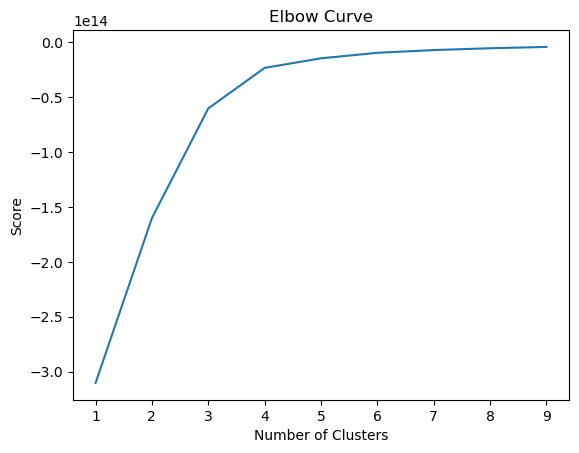

In [92]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### #Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
#### Explain why you chose that number in a markdown cell.
#### If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

##### I will chosee 3 cluster, even if is not a so clear breaking point after that point it flatten more

### 5 Run the k-means algorithm.

In [93]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3) 

In [94]:
# Fit the k-means object to the data.

kmeans.fit(df_rent)

/Users/michaelyeboah/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [95]:
df_rent['clusters'] = kmeans.fit_predict(df_rent)

/Users/michaelyeboah/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [96]:
df_rent

,Picture count,Base Rent,Living Space,Base Rent Range,Geo_plz,No Rooms,No Rooms Range,Living Space Range,clusters
0,6,595.0,86.00,4,44269,4.0,4,4,0
1,8,800.0,89.00,5,67459,3.0,3,4,0
2,8,965.0,83.80,6,1097,3.0,3,4,1
3,9,343.0,58.15,2,9599,3.0,3,2,1
4,19,765.0,84.97,5,28213,3.0,3,4,1
...,...,...,...,...,...,...,...,...,...
268845,0,820.0,90.00,6,82390,3.0,3,4,0
268846,12,930.0,115.00,6,68519,3.5,3,5,0
268847,21,650.0,95.00,5,65552,4.0,4,4,0
268848,16,840.0,70.00,6,51069,2.0,2,3,0


In [97]:
df_rent['clusters'].value_counts()

0    139315
1    129534
2         1
Name: clusters, dtype: int64

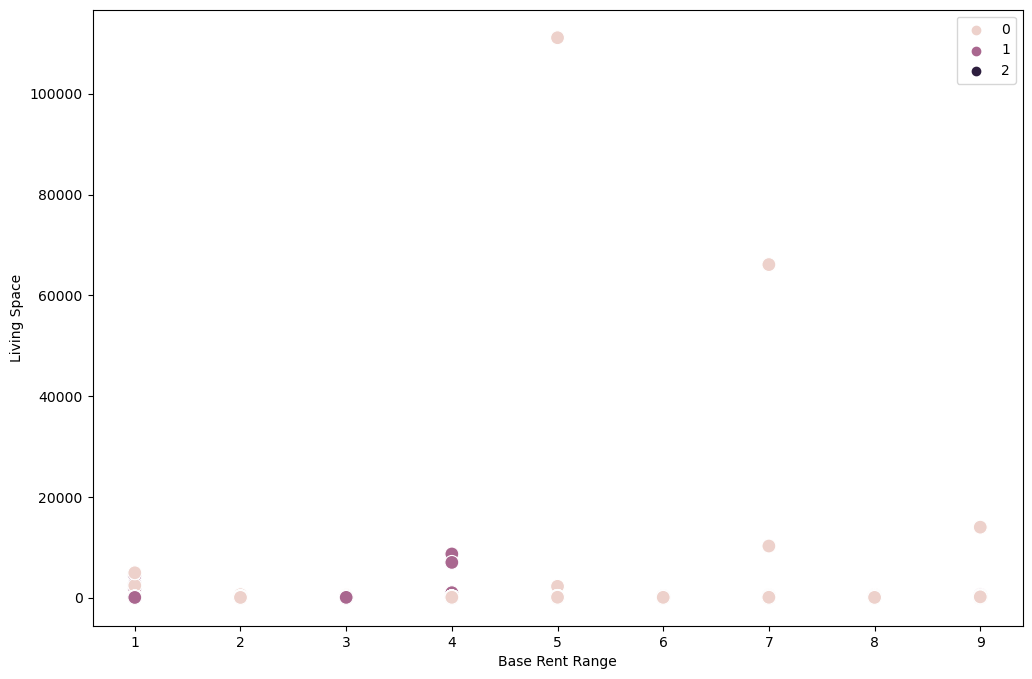

In [101]:
# Plot the clusters for the "value_in_eur" and "views_last_7_days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_rent['Base Rent Range'], y=df_rent['Living Space'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Base Rent Range') # Label x-axis.
plt.ylabel('Living Space') # Label y-axis.
plt.show()

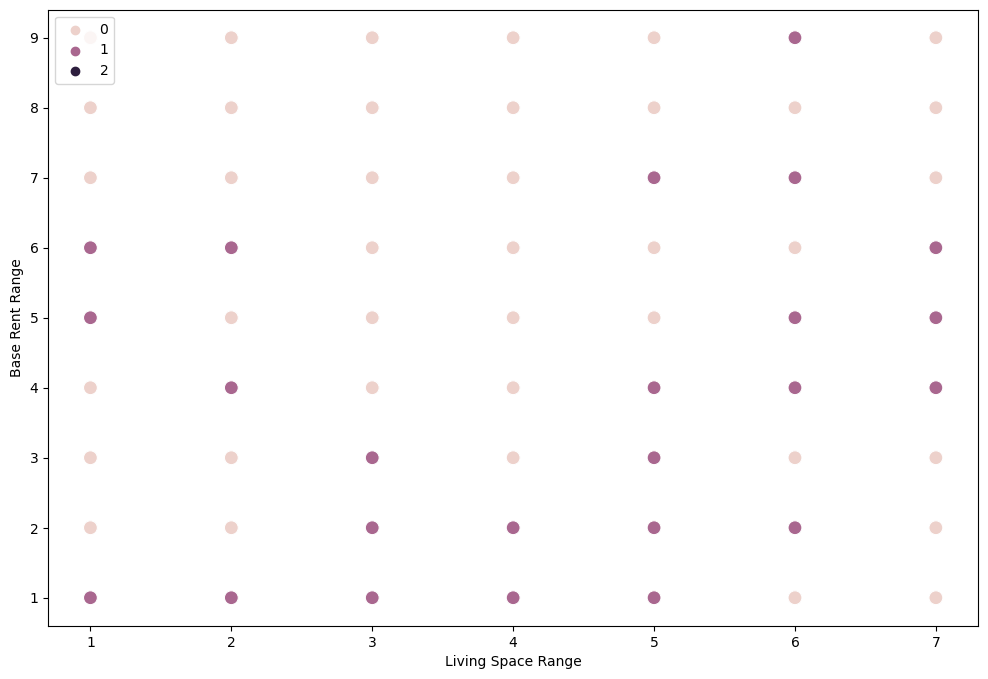

In [102]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_rent['Living Space Range'], y=df_rent['Base Rent Range'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Living Space Range') 
plt.ylabel('Base Rent Range') 
plt.show()

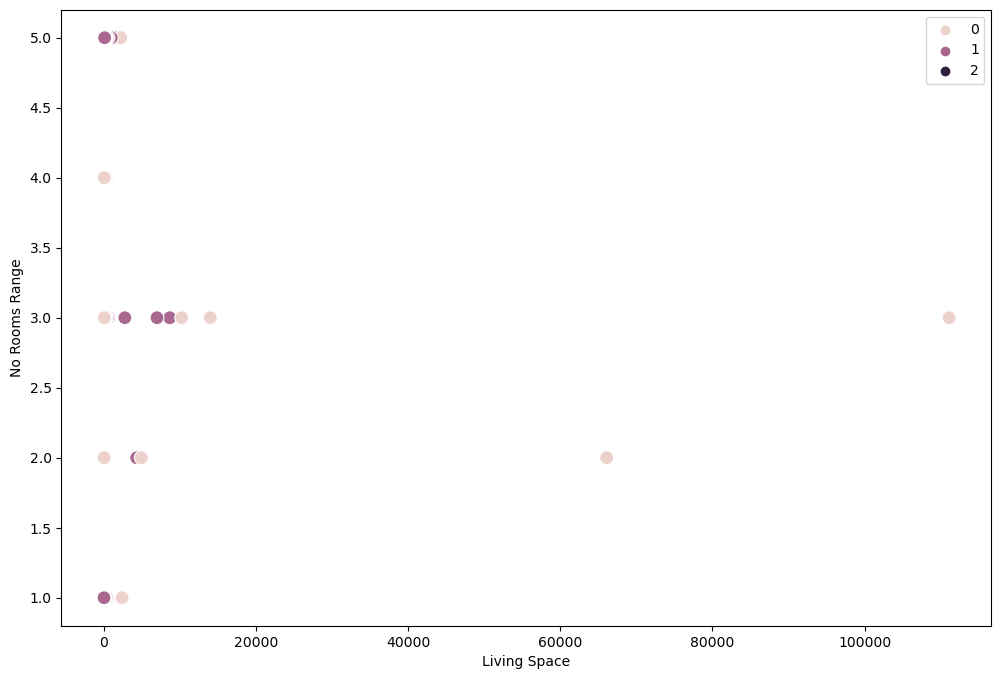

In [104]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_rent['Living Space'], y=df_rent['No Rooms Range'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Living Space') 
plt.ylabel('No Rooms Range') 
plt.show()

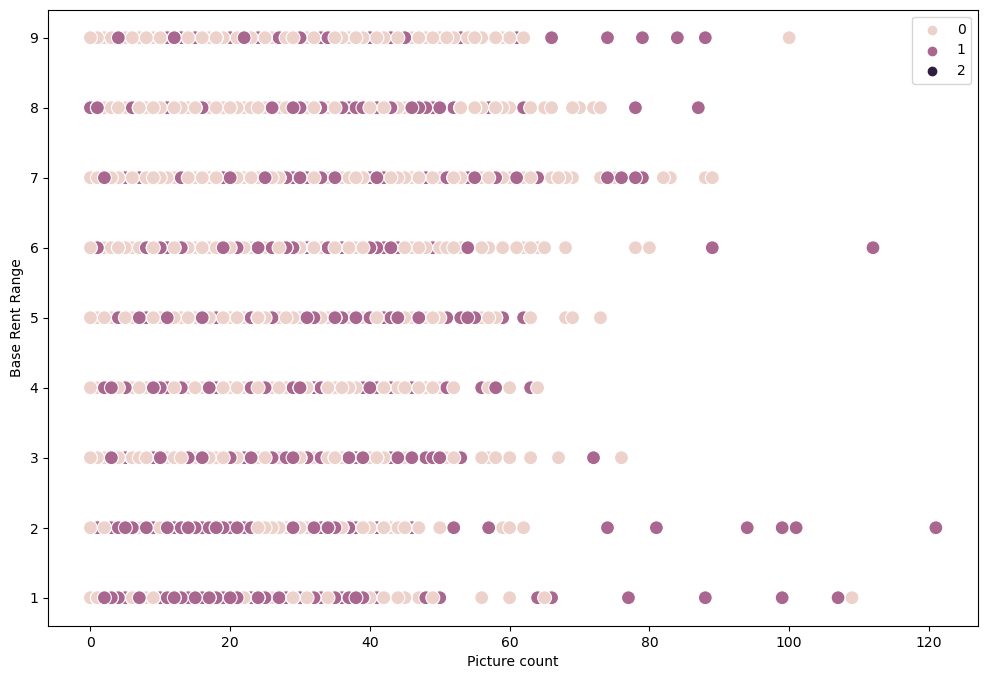

In [106]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_rent['Picture count'], y=df_rent['Base Rent Range'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Picture count') 
plt.ylabel('Base Rent Range') 
plt.show()

### Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further. 

##### The most usefull information we can get from here is,the clusters supports the hypothesis that number of rooms preferred is based on the number of household and the living space.

##### People are interested in the location,type of energy used and some choice factors in making a decsion for a flat

### Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [107]:
# renaming the clusters 
df_rent.loc[df_rent['clusters'] == 2, 'cluster'] = 'dark purple'
df_rent.loc[df_rent['clusters'] == 1, 'cluster'] = 'purple'
df_rent.loc[df_rent['clusters'] == 0, 'cluster'] = 'pink'

In [108]:
df_rent.groupby('cluster').agg({'Living Space Range':['mean', 'median'], 
                              'No Rooms Range':['mean', 'median'], 
                              'Living Space':['mean', 'median'],
                              'Picture count':['mean', 'median'],
                              'Base Rent Range':['mean', 'median']})

Living Space Range        No Rooms Range        Living Space  \
                          mean median           mean median         mean   
cluster                                                                    
dark purple           1.000000    1.0       1.000000    1.0     1.000000   
pink                  3.235057    3.0       2.608980    3.0    78.392288   
purple                2.894136    3.0       2.531289    2.0    70.014563   

                   Picture count        Base Rent Range         
            median          mean median            mean median  
cluster                                                         
dark purple   1.00      0.000000    0.0        9.000000    9.0  
pink         71.85      9.945340    9.0        4.309952    4.0  
purple       63.68      9.627071    9.0        3.179389    2.0

### Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

#### - We can apreciate that the dark purple group is the one that recieve mos visit in general, but they are also just a few and this can take the numbers up. this represent big and expensive units.
#### - For the other groups we can notice similar numbers in terms of views even if in the other stats they differ, we can observe a similar performance

### Propose what these results could be useful for in future steps of an analytics pipeline.

####In the near future there should be a further findings on German-States with average cheapest rental properties and homes for sale  